## 1. Bagging, Bootstrap Aggregating

Bagging with Decision Tree

주요 코드 부분 설명

In [ ]:
# 데이터 로드 및 분할:

# Iris 데이터셋을 사용합니다. 이는 꽃의 여러 특성(예: 꽃잎 길이, 꽃받침 너비)을 사용하여 품종을 예측하는 문제입니다.
# 데이터를 학습용(70%)과 테스트용(30%)으로 분할합니다.

# 배깅 모델 생성:
# 1. base_model = DecisionTreeClassifier(random_state=42)
# DecisionTreeClassifier: 이는 의사결정 나무(결정 트리) 모델을 생성합니다. 
# 결정 트리는 데이터를 특정 기준에 따라 반복적으로 분할하며 분류하거나 회귀 문제를 해결하는 데 사용됩니다.
# random_state=42: 무작위성을 고정하여 결과의 재현성을 확보합니다. 42는 일반적으로 실험의 일관성을 위해 사용되는 임의의 값이며, 다른 정수 값도 사용할 수 있습니다.
# 이 코드에서는 base_model이라는 변수에 결정 트리 모델을 할당하여 이후에 배깅 앙상블 학습의 기본 모델로 사용합니다.

# 2. bagging_model = BaggingClassifier(estimator=base_model, n_estimators=50, random_state=42)
# BaggingClassifier: BaggingClassifier는 scikit-learn 라이브러리에서 제공하는 배깅(Bagging) 앙상블 모델입니다. 
# 배깅은 Bootstrap Aggregating의 줄임말로, 같은 모델을 여러 번 학습시켜 예측을 결합하는 앙상블 학습 방법입니다. 
# 데이터의 일부를 무작위로 샘플링하여 각 모델을 학습시키므로 과적합을 줄이고 예측 성능을 향상시킬 수 있습니다.

# 매개변수 설명:
# estimator=base_model: 배깅 앙상블을 구성할 기본 모델을 설정합니다. 여기서는 DecisionTreeClassifier로 정의된 base_model을 사용합니다. 즉, 배깅 모델은 여러 개의 결정 트리를 학습하게 됩니다.
# n_estimators=50: 배깅 앙상블에 포함될 기본 모델의 개수를 설정합니다. 
# 여기서는 50개의 결정 트리를 학습시키겠다는 의미입니다. 
# 배깅의 기본 모델 개수를 늘리면 더 안정적인 결과를 얻을 수 있지만, 학습 시간과 메모리 사용량이 증가할 수 있습니다.
# random_state=42: 각 기본 모델에 사용되는 데이터 샘플링 및 무작위성의 재현성을 확보하기 위해 사용됩니다.

# 모델 학습 및 예측:
# 학습 데이터로 배깅 모델을 학습시킵니다.
# 테스트 데이터에서 예측을 수행합니다.

# 모델 평가:
# accuracy_score, confusion_matrix, classification_report를 사용하여 모델의 성능을 평가합니다.
# 특성 중요도 시각화:

# 각 의사결정 나무에서 계산된 특성 중요도를 평균화하여, 전체 배깅 모델의 특성 중요도를 계산하고 시각화합니다.

Bagging Model Accuracy: 1.00
Confusion Matrix:
 [[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



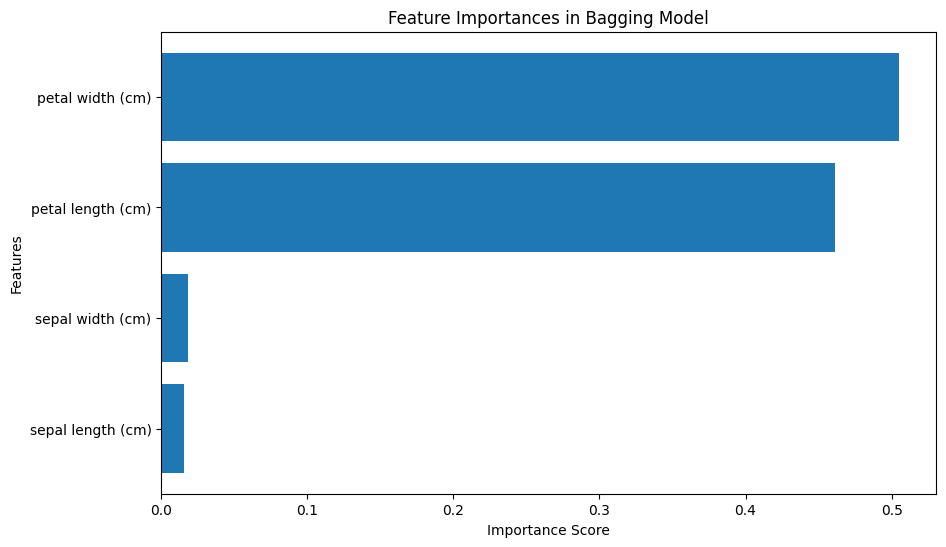

In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt

# 1. 데이터 로드
data = load_iris()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target)

# 2. 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 3. 배깅 모델 생성 (기본 모델: 의사결정 나무)
base_model = DecisionTreeClassifier(random_state=42)
bagging_model = BaggingClassifier(estimator=base_model, n_estimators=50, random_state=42)

# 4. 모델 학습
bagging_model.fit(X_train, y_train)

# 5. 예측 및 평가
y_pred = bagging_model.predict(X_test)

# 정확도 출력
accuracy = accuracy_score(y_test, y_pred)
print(f"Bagging Model Accuracy: {accuracy:.2f}")

# 혼동 행렬 및 분류 보고서 출력
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)
print("Classification Report:\n", classification_report(y_test, y_pred))

# 6. 특성 중요도 시각화
feature_importances = np.mean([
    tree.feature_importances_ for tree in bagging_model.estimators_
], axis=0)
features = X.columns

plt.figure(figsize=(10, 6))
plt.barh(features, feature_importances)
plt.title('Feature Importances in Bagging Model')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.show()


## 2. Random Forest with Iris Dataset)

In [ ]:
# 코드 설명
# 데이터 로드 및 분할:

# Iris 데이터셋을 사용하며, 이를 학습 데이터(70%)와 테스트 데이터(30%)로 분할합니다.
# 랜덤 포레스트 모델 생성:

# RandomForestClassifier를 사용하여 모델을 생성합니다.
# n_estimators=100: 100개의 의사결정 나무를 사용합니다.
# max_depth=5: 각 나무의 최대 깊이를 5로 제한하여 과적합을 방지합니다.
# 모델 학습 및 예측:

# 학습 데이터로 모델을 학습시키고, 테스트 데이터에서 예측을 수행합니다.
# 모델 평가:

# 정확도, 혼동 행렬, 분류 보고서를 출력하여 모델의 성능을 평가합니다.
# 특성 중요도 시각화:

# 랜덤 포레스트는 각 특성의 중요도를 계산할 수 있으며, 이를 바 그래프로 시각화합니다.

Random Forest Model Accuracy: 1.00
Confusion Matrix:
 [[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



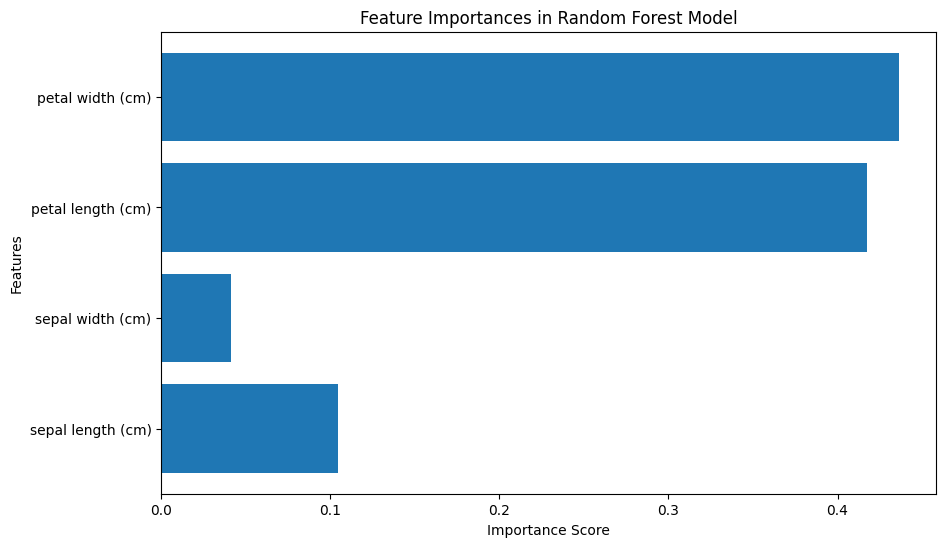

In [4]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt

# 1. 데이터 로드
data = load_iris()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target)

# 2. 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 3. 랜덤 포레스트 모델 생성
rf_model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42)
rf_model.fit(X_train, y_train)

# 4. 예측 및 평가
y_pred = rf_model.predict(X_test)

# 정확도 출력
accuracy = accuracy_score(y_test, y_pred)
print(f"Random Forest Model Accuracy: {accuracy:.2f}")

# 혼동 행렬 및 분류 보고서 출력
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)
print("Classification Report:\n", classification_report(y_test, y_pred))

# 5. 특성 중요도 시각화
feature_importances = rf_model.feature_importances_
features = X.columns

plt.figure(figsize=(10, 6))
plt.barh(features, feature_importances)
plt.title('Feature Importances in Random Forest Model')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.show()


## 3. 비교

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_iris

# 데이터 로드
data = load_iris()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target)

# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 배깅 모델 생성
bagging_model = BaggingClassifier(n_estimators=100, random_state=42)
bagging_model.fit(X_train, y_train)

# 랜덤 포레스트 모델 생성
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# 예측 및 평가
y_pred_bagging = bagging_model.predict(X_test)
y_pred_rf = rf_model.predict(X_test)

# 정확도 비교
accuracy_bagging = accuracy_score(y_test, y_pred_bagging)
accuracy_rf = accuracy_score(y_test, y_pred_rf)

print(f"Bagging Model Accuracy: {accuracy_bagging:.2f}")
print(f"Random Forest Model Accuracy: {accuracy_rf:.2f}")


Bagging Model Accuracy: 1.00
Random Forest Model Accuracy: 1.00


## 4. Bagging vs Random Forest for Credit Card Fraud Detection

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt

# 1. 데이터 로드
df = pd.read_csv("creditcard.csv")
print(df.head())
print(df['Class'].value_counts())

# 2. 데이터 전처리
X = df.drop(columns=['Class'])
y = df['Class']

# 데이터 스케일링 (Amount 컬럼)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X['Amount'] = scaler.fit_transform(X[['Amount']])

# 3. 학습 데이터와 테스트 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# 4. 배깅 모델 생성 (기본 모델: 의사결정 나무)
base_model = DecisionTreeClassifier(random_state=42)
bagging_model = BaggingClassifier(estimator=base_model, n_estimators=50, random_state=42)

# 5. 랜덤 포레스트 모델 생성
rf_model = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42, class_weight='balanced')

# 6. 모델 학습
bagging_model.fit(X_train, y_train)
rf_model.fit(X_train, y_train)

# 7. 예측 및 평가 (배깅 모델)
y_pred_bagging = bagging_model.predict(X_test)
accuracy_bagging = accuracy_score(y_test, y_pred_bagging)
print(f"Bagging Model Accuracy: {accuracy_bagging:.2f}")
print("Confusion Matrix (Bagging):\n", confusion_matrix(y_test, y_pred_bagging))
print("Classification Report (Bagging):\n", classification_report(y_test, y_pred_bagging))

# 8. 예측 및 평가 (랜덤 포레스트 모델)
y_pred_rf = rf_model.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Random Forest Model Accuracy: {accuracy_rf:.2f}")
print("Confusion Matrix (Random Forest):\n", confusion_matrix(y_test, y_pred_rf))
print("Classification Report (Random Forest):\n", classification_report(y_test, y_pred_rf))

# 9. 특성 중요도 시각화 (랜덤 포레스트)
feature_importances = rf_model.feature_importances_
features = X.columns

plt.figure(figsize=(12, 6))
plt.barh(features, feature_importances)
plt.title('Feature Importances in Random Forest Model')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.show()


   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28 

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Jupyter Notebook에서 그래프 출력 설정
%matplotlib inline

# 1. 데이터 로드
try:
    df = pd.read_csv("creditcard.csv")
    print("Data loaded successfully.")
except FileNotFoundError:
    print("Error: 'creditcard.csv' file not found. Please check the file path.")

# 데이터 확인
print(df.head())
print(df['Class'].value_counts())

# 2. 데이터 전처리
X = df.drop(columns=['Class'])
y = df['Class']

# Amount 컬럼 스케일링
scaler = StandardScaler()
X['Amount'] = scaler.fit_transform(X[['Amount']])

# 3. 학습 데이터와 테스트 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# 4. 배깅 모델 생성 (기본 모델: 의사결정 나무)
base_model = DecisionTreeClassifier(random_state=42)
bagging_model = BaggingClassifier(estimator=base_model, n_estimators=50, random_state=42)

# 5. 랜덤 포레스트 모델 생성
rf_model = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42, class_weight='balanced')

# 6. 모델 학습
bagging_model.fit(X_train, y_train)
rf_model.fit(X_train, y_train)

# 7. 배깅 모델 평가
print("\n--- Bagging Model Evaluation ---")
y_pred_bagging = bagging_model.predict(X_test)
accuracy_bagging = accuracy_score(y_test, y_pred_bagging)
print(f"Bagging Model Accuracy: {accuracy_bagging:.2f}")
print("Confusion Matrix (Bagging):\n", confusion_matrix(y_test, y_pred_bagging))
print("Classification Report (Bagging):\n", classification_report(y_test, y_pred_bagging))

# 8. 랜덤 포레스트 모델 평가
print("\n--- Random Forest Model Evaluation ---")
y_pred_rf = rf_model.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Random Forest Model Accuracy: {accuracy_rf:.2f}")
print("Confusion Matrix (Random Forest):\n", confusion_matrix(y_test, y_pred_rf))
print("Classification Report (Random Forest):\n", classification_report(y_test, y_pred_rf))

# 9. 특성 중요도 시각화 (랜덤 포레스트)
feature_importances = rf_model.feature_importances_
features = X.columns

plt.figure(figsize=(12, 6))
plt.barh(features, feature_importances, color='skyblue')
plt.title('Feature Importances in Random Forest Model')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.show()
